In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import os

In [2]:
from pathlib import Path
from keras import backend as K
from keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras_preprocessing import image

In [3]:
train_data_path = '../../sensix_daninhas/dataset_100x100/train'
test_data_path  = '../../sensix_daninhas/dataset_100x100/validation'

In [4]:
img_rows = 100
img_cols = 100
epochs = 300
batch_size = 32

In [5]:
num_of_train_samples = len(glob.glob(train_data_path + "/**/*" + ".jpg" , recursive=True))
num_of_test_samples  = len(glob.glob(test_data_path + "/**/*" + ".jpg"  , recursive=True))
print("Train Images : ", num_of_train_samples)
print("Test Images  : ", num_of_test_samples)


Train Images :  193
Test Images  :  43


In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 193 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
model.fit(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/300
6/6 [==============================] - 3s 343ms/step - loss: 1.2890 - accuracy: 0.5841 - val_loss: 0.6870 - val_accuracy: 0.5312
Epoch 2/300
6/6 [==============================] - 1s 196ms/step - loss: 0.7102 - accuracy: 0.5073 - val_loss: 0.7057 - val_accuracy: 0.5000
Epoch 3/300
6/6 [==============================] - 1s 217ms/step - loss: 0.6962 - accuracy: 0.5457 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 4/300
6/6 [==============================] - 2s 250ms/step - loss: 0.6938 - accuracy: 0.5307 - val_loss: 0.6807 - val_accuracy: 0.5312
Epoch 5/300
6/6 [==============================] - 1s 208ms/step - loss: 0.6867 - accuracy: 0.5443 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 6/300
6/6 [==============================] - 1s 220ms/step - loss: 0.6800 - accuracy: 0.5328 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 7/300
6/6 [==============================] - 1s 219ms/step - loss: 0.7016 - accuracy: 0.5191 - val_loss: 0.9540 - val_accuracy: 0.4688
Epoch 8/300
6

Epoch 59/300
6/6 [==============================] - 1s 215ms/step - loss: 0.6443 - accuracy: 0.8078 - val_loss: 0.5947 - val_accuracy: 0.5938
Epoch 60/300
6/6 [==============================] - 2s 297ms/step - loss: 0.4757 - accuracy: 0.8998 - val_loss: 0.4808 - val_accuracy: 0.7500
Epoch 61/300
6/6 [==============================] - 2s 252ms/step - loss: 0.3839 - accuracy: 0.8754 - val_loss: 0.5950 - val_accuracy: 0.7188
Epoch 62/300
6/6 [==============================] - 1s 227ms/step - loss: 0.5172 - accuracy: 0.7119 - val_loss: 0.5262 - val_accuracy: 0.6562
Epoch 63/300
6/6 [==============================] - 2s 264ms/step - loss: 0.4233 - accuracy: 0.8159 - val_loss: 1.4132 - val_accuracy: 0.5312
Epoch 64/300
6/6 [==============================] - 2s 252ms/step - loss: 0.8024 - accuracy: 0.7603 - val_loss: 0.4688 - val_accuracy: 0.7812
Epoch 65/300
6/6 [==============================] - 1s 232ms/step - loss: 0.3270 - accuracy: 0.8575 - val_loss: 0.4767 - val_accuracy: 0.7500
Epoch 

6/6 [==============================] - 1s 291ms/step - loss: 0.3751 - accuracy: 0.8707 - val_loss: 0.3830 - val_accuracy: 0.7500
Epoch 117/300
6/6 [==============================] - 2s 258ms/step - loss: 0.3473 - accuracy: 0.8675 - val_loss: 0.3529 - val_accuracy: 0.8125
Epoch 118/300
6/6 [==============================] - 2s 247ms/step - loss: 0.3792 - accuracy: 0.8533 - val_loss: 0.4082 - val_accuracy: 0.7500
Epoch 119/300
6/6 [==============================] - 1s 224ms/step - loss: 0.9700 - accuracy: 0.7612 - val_loss: 0.5330 - val_accuracy: 0.6875
Epoch 120/300
6/6 [==============================] - 2s 231ms/step - loss: 0.4872 - accuracy: 0.7086 - val_loss: 0.3740 - val_accuracy: 0.7500
Epoch 121/300
6/6 [==============================] - 2s 244ms/step - loss: 0.6655 - accuracy: 0.7676 - val_loss: 0.4604 - val_accuracy: 0.7500
Epoch 122/300
6/6 [==============================] - 2s 238ms/step - loss: 0.3387 - accuracy: 0.8795 - val_loss: 0.4931 - val_accuracy: 0.7812
Epoch 123/300

6/6 [==============================] - 2s 235ms/step - loss: 0.2332 - accuracy: 0.8848 - val_loss: 0.2698 - val_accuracy: 0.8125
Epoch 174/300
6/6 [==============================] - 2s 250ms/step - loss: 0.1956 - accuracy: 0.9256 - val_loss: 0.2237 - val_accuracy: 0.8438
Epoch 175/300
6/6 [==============================] - 1s 216ms/step - loss: 0.2563 - accuracy: 0.8770 - val_loss: 0.2732 - val_accuracy: 0.8125
Epoch 176/300
6/6 [==============================] - 2s 307ms/step - loss: 0.1718 - accuracy: 0.9319 - val_loss: 0.2504 - val_accuracy: 0.9062
Epoch 177/300
6/6 [==============================] - 2s 247ms/step - loss: 0.4521 - accuracy: 0.9152 - val_loss: 0.3805 - val_accuracy: 0.7812
Epoch 178/300
6/6 [==============================] - 1s 228ms/step - loss: 0.3671 - accuracy: 0.8310 - val_loss: 0.3094 - val_accuracy: 0.7500
Epoch 179/300
6/6 [==============================] - 2s 280ms/step - loss: 0.2718 - accuracy: 0.8967 - val_loss: 0.8846 - val_accuracy: 0.7500
Epoch 180/300

6/6 [==============================] - 2s 234ms/step - loss: 0.3906 - accuracy: 0.8818 - val_loss: 0.4268 - val_accuracy: 0.9062
Epoch 231/300
6/6 [==============================] - 2s 259ms/step - loss: 0.3562 - accuracy: 0.8229 - val_loss: 0.2485 - val_accuracy: 0.8125
Epoch 232/300
6/6 [==============================] - 2s 256ms/step - loss: 0.1461 - accuracy: 0.9578 - val_loss: 0.1660 - val_accuracy: 0.9375
Epoch 233/300
6/6 [==============================] - 1s 215ms/step - loss: 0.2173 - accuracy: 0.9158 - val_loss: 0.1890 - val_accuracy: 0.9688
Epoch 234/300
6/6 [==============================] - 2s 249ms/step - loss: 0.2968 - accuracy: 0.8744 - val_loss: 0.1509 - val_accuracy: 0.9688
Epoch 235/300
6/6 [==============================] - 2s 247ms/step - loss: 0.2405 - accuracy: 0.9098 - val_loss: 0.1996 - val_accuracy: 0.9062
Epoch 236/300
6/6 [==============================] - 2s 247ms/step - loss: 0.1925 - accuracy: 0.8990 - val_loss: 0.3519 - val_accuracy: 0.7500
Epoch 237/300

6/6 [==============================] - 2s 249ms/step - loss: 0.1646 - accuracy: 0.9294 - val_loss: 0.2108 - val_accuracy: 0.8438
Epoch 288/300
6/6 [==============================] - 1s 228ms/step - loss: 0.1831 - accuracy: 0.9053 - val_loss: 0.2024 - val_accuracy: 0.8750
Epoch 289/300
6/6 [==============================] - 2s 257ms/step - loss: 0.1821 - accuracy: 0.8951 - val_loss: 0.3407 - val_accuracy: 0.8125
Epoch 290/300
6/6 [==============================] - 2s 244ms/step - loss: 0.1453 - accuracy: 0.9581 - val_loss: 0.1287 - val_accuracy: 0.9375
Epoch 291/300
6/6 [==============================] - 2s 231ms/step - loss: 0.4244 - accuracy: 0.8761 - val_loss: 0.1798 - val_accuracy: 0.9062
Epoch 292/300
6/6 [==============================] - 2s 251ms/step - loss: 0.1795 - accuracy: 0.9277 - val_loss: 0.1754 - val_accuracy: 0.9375
Epoch 293/300
6/6 [==============================] - 2s 236ms/step - loss: 0.1683 - accuracy: 0.9455 - val_loss: 0.2049 - val_accuracy: 0.8750
Epoch 294/300

In [11]:
Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
#print(Y_pred)

In [12]:
print("Real :       ", validation_generator.classes)
print("Prediction : ", y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Real :        [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Prediction :  [0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 0]
Confusion Matrix
[[16  5]
 [15  7]]


In [13]:
print('Classification Report')
target_names = ['daninhas', 'sem_daninhas']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    daninhas       0.52      0.76      0.62        21
sem_daninhas       0.58      0.32      0.41        22

    accuracy                           0.53        43
   macro avg       0.55      0.54      0.51        43
weighted avg       0.55      0.53      0.51        43



In [16]:
model.save("daninhas_confusion_matrix_jp.h5")

In [14]:
image_path = '../../sensix_daninhas/dataset_100x100/validation/daninha'

images = []

for img in os.listdir(image_path):
        img = os.path.join(image_path, img)
        img = image.load_img(img, target_size=(100,100))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        processed_image = np.array(img, dtype="float") / 255.0
        images.append(processed_image)

images = np.vstack(images)

count_daninha 16
count_sem_daninha 5


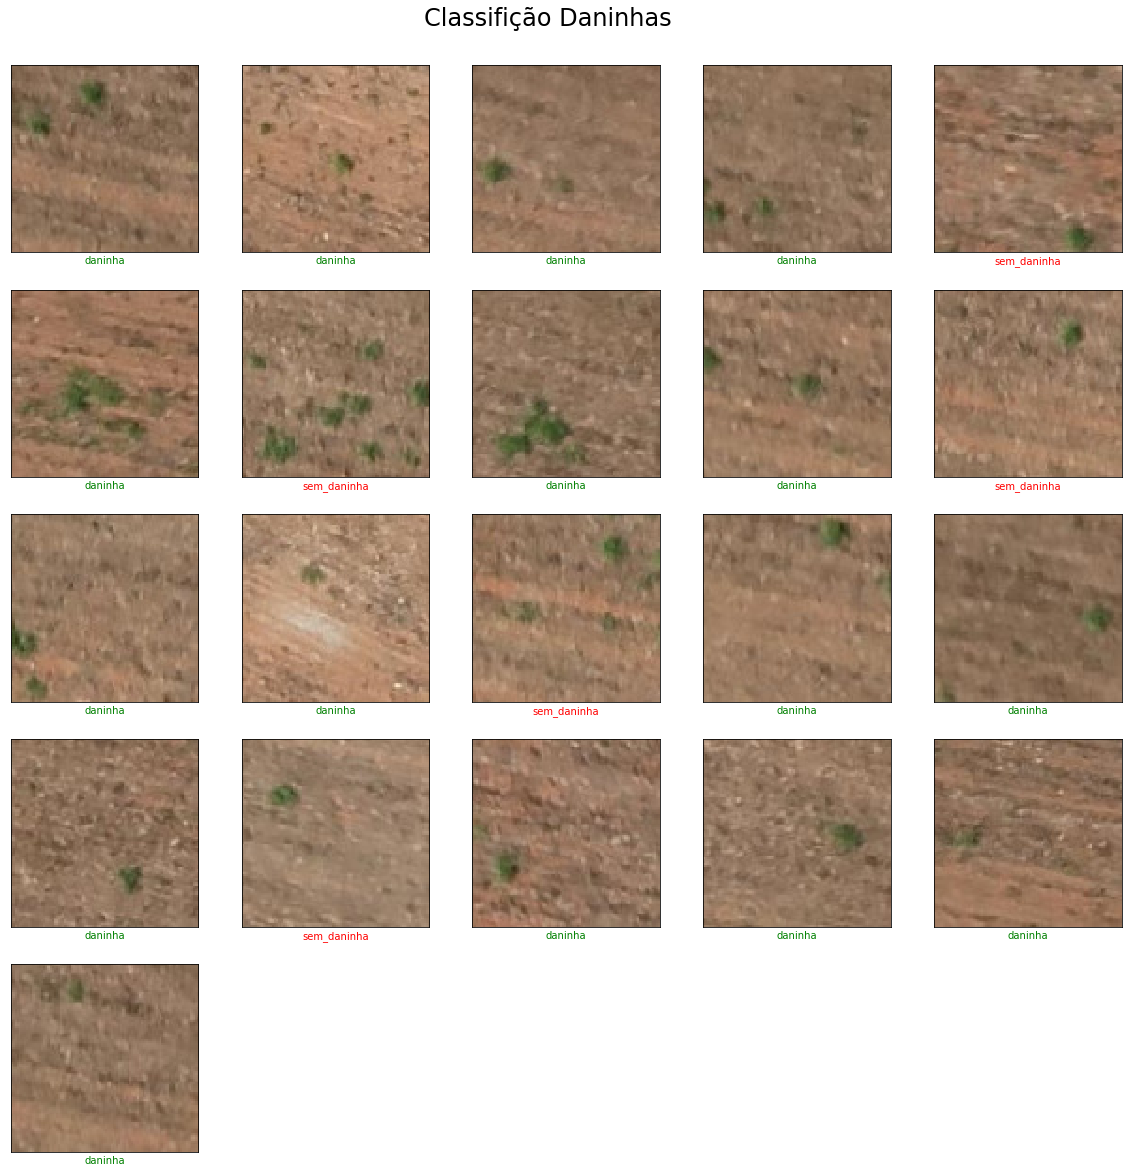

In [15]:
images_data = []
filenames = []
count_daninha = 0
count_sem_daninha = 0
count = 0

pred_result = model.predict(validation_generator, num_of_test_samples // batch_size+1)
plt.figure(figsize=(20,20))
grid_size = min(50, len(pred_result))

for filename in os.listdir(image_path):
    images_data.append(pred_result)
    filenames.append(filename)
    plt.subplot(5, 5, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[count], cmap=plt.cm.binary)
    if pred_result[count][0]> pred_result[count][1]:
        legend_x = plt.xlabel("daninha")
        legend_x.set_color("green")
        count_daninha = count_daninha + 1
        if count >= num_of_test_samples -1:
            break
    else :
        legend_x = plt.xlabel("sem_daninha")
        legend_x.set_color("red")
        count_sem_daninha = count_sem_daninha + 1
    count += 1

print("count_daninha", count_daninha)
print("count_sem_daninha", count_sem_daninha)
plt.suptitle('Classifição Daninhas', y = 0.92, fontsize=24)
plt.show()
#print(pred_result)
#print(pred_result[0])
#print(pred_result[0][1])
